In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('pfe_with_macro.csv', parse_dates=['Date'], index_col='Date') 
corr_matrix = df.corr()


target_corr = corr_matrix['target_return'].drop('target_return').abs()
selected_features = target_corr[target_corr > 0.0].index.tolist()


feature_corr_matrix = corr_matrix.loc[selected_features, selected_features]

to_drop = set()
for i in range(len(feature_corr_matrix.columns)):
    for j in range(i):
        if abs(feature_corr_matrix.iloc[i, j]) > 0.9:
            col_to_drop = feature_corr_matrix.columns[i]
            to_drop.add(col_to_drop)


final_features = list(set(selected_features) - to_drop)
X = df[final_features]
y = df['target_return']
print(final_features)

['volume_avg_20_', 'news_sentiment', 'Close_PFE', 'volume_surprise_', 'exclusivity_expiry', 'vol_5', 'momentum_20_', 'pe_ratio_', 'volatility_20_', 'ma_diff', 'alpha', 'target_roll_mean_5', 'Volume_PFE', 'return_t-1', 'Expected_Inflation', 'momentum_5_', 'Fed_Funds_Rate', 'target_return_lag2', 'product_approval', '10Y_Treasury_Yield', 'macd_', 'dividend_yield_', 'imi_', 'market_cap_', 'target_return_lag3', 'patent_expiry', 'JNJ_Volume', 'intraday_change_', 'BMY_Close', 'twitter_sentiment', 'MRK_Volume', 'ABBV_Volume', 'rsi_', 'target_roll_std_5', 'BMY_Volume', 'recall_flag']


                    Close_PFE  High_PFE   Low_PFE  Open_PFE  Volume_PFE  \
Close_PFE            1.000000  0.999714  0.999692  0.999373    0.295992   
High_PFE             0.999714  1.000000  0.999587  0.999695    0.289125   
Low_PFE              0.999692  0.999587  1.000000  0.999670    0.302932   
Open_PFE             0.999373  0.999695  0.999670  1.000000    0.295220   
Volume_PFE           0.295992  0.289125  0.302932  0.295220    1.000000   
...                       ...       ...       ...       ...         ...   
target_return_lag1   0.003438  0.009802  0.009781  0.022859    0.025219   
target_return_lag2   0.002187  0.003110  0.003070  0.002866    0.003442   
target_return_lag3   0.002462  0.002754  0.003116  0.002817    0.013991   
target_roll_mean_5   0.011073  0.016624  0.016198  0.022742    0.007202   
target_roll_std_5    0.175899  0.183573  0.167418  0.175466    0.340022   

                    momentum_5_  momentum_20_  volatility_20_  volume_avg_20_  \
Close_PFE         

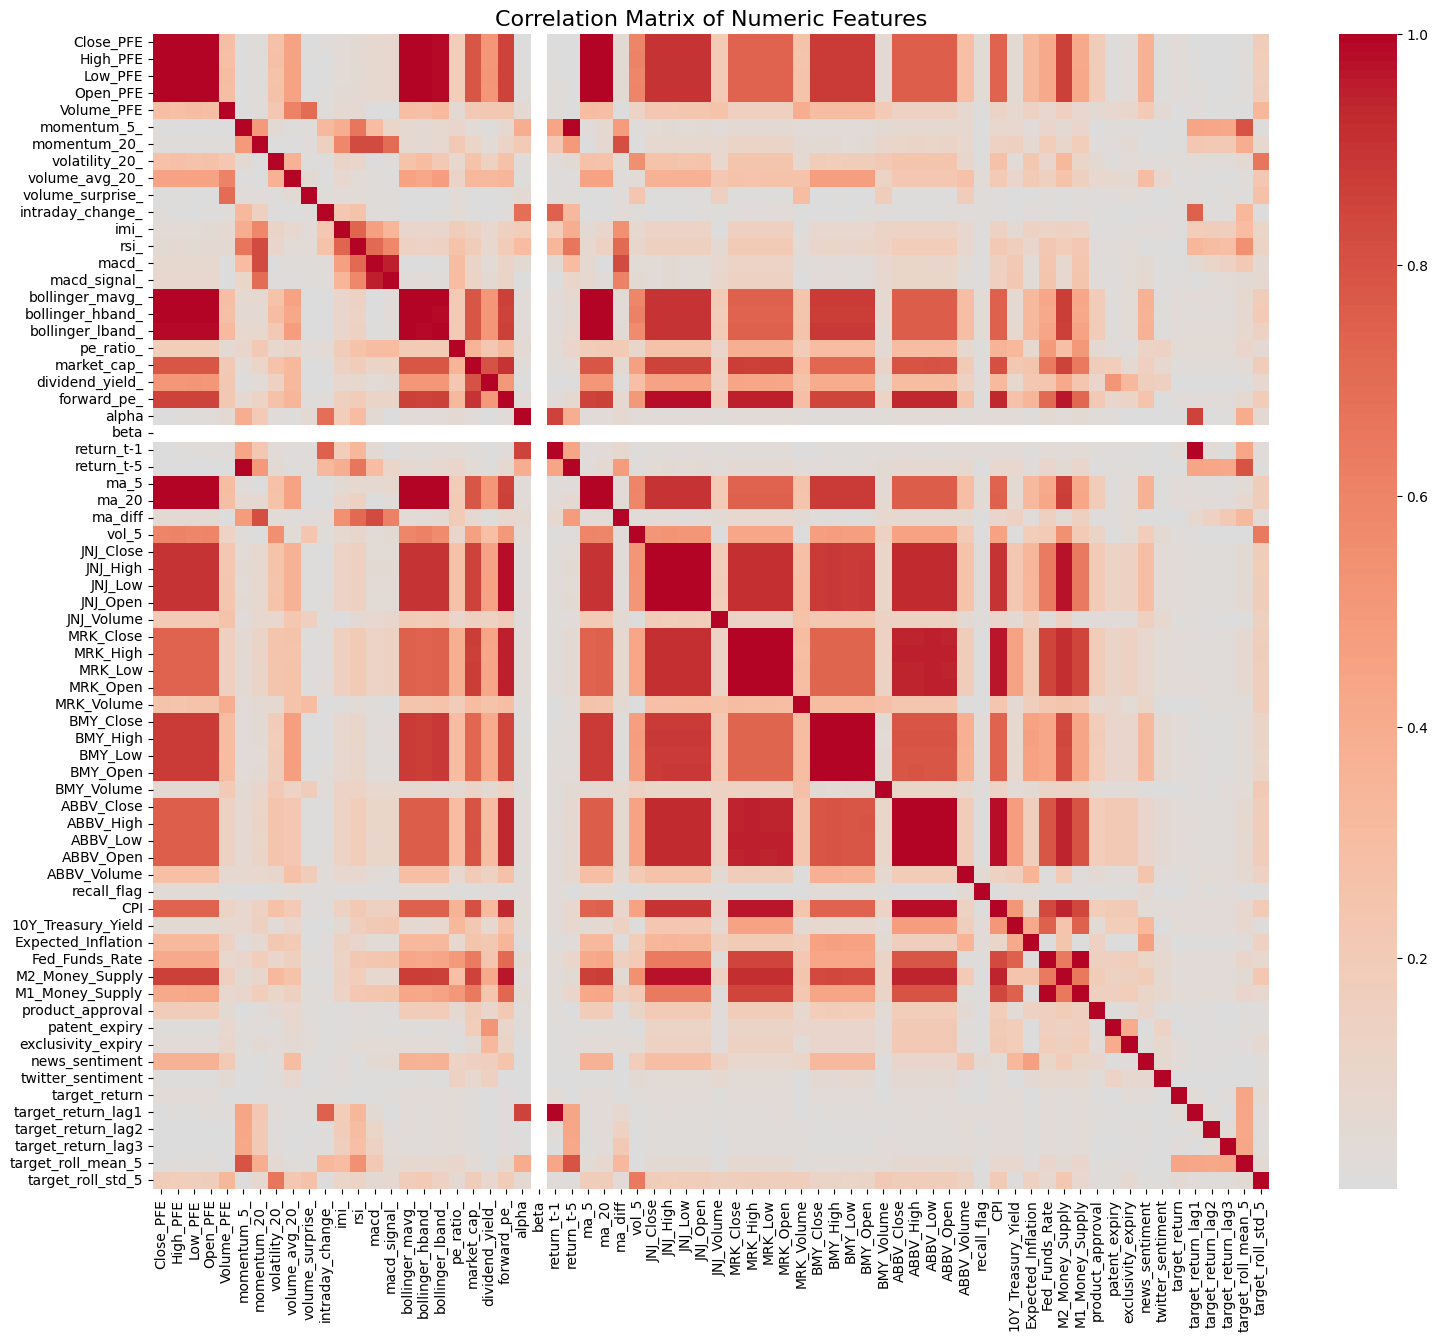

In [5]:
numeric_df = df.select_dtypes(include=[np.number])
print(corr_matrix)
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

In [3]:
df = pd.read_csv("pfe_with_macro.csv")
target_variable = "target_return"
non_numeric_cols = df.select_dtypes(include='object').columns.tolist()
df_numeric = df.drop(columns=non_numeric_cols)

corr_matrix = df_numeric.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.9
to_drop = set()

for col in upper_triangle.columns:
    for row in upper_triangle.index:
        if upper_triangle.loc[row, col] > threshold:
            if row in to_drop or col in to_drop:
                continue
            row_corr = corr_matrix.loc[row, target_variable] if row != target_variable else 1.0
            col_corr = corr_matrix.loc[col, target_variable] if col != target_variable else 1.0
            if row_corr < col_corr:
                to_drop.add(row)
            else:
                to_drop.add(col)

df_cleaned = df.drop(columns=to_drop)

print("Dropped correlated features (based on target-aware selection):")
print(sorted(to_drop))

df_cleaned.to_csv("pfe_with_macro_uncorrelated.csv", index=False)


Dropped correlated features (based on target-aware selection):
['ABBV_High', 'ABBV_Low', 'ABBV_Open', 'BMY_High', 'BMY_Low', 'BMY_Open', 'CPI', 'Close_PFE', 'High_PFE', 'JNJ_Close', 'JNJ_High', 'JNJ_Low', 'JNJ_Open', 'Low_PFE', 'M1_Money_Supply', 'M2_Money_Supply', 'MRK_Close', 'MRK_High', 'MRK_Low', 'MRK_Open', 'Open_PFE', 'bollinger_hband_', 'bollinger_mavg_', 'forward_pe_', 'ma_20', 'ma_5', 'macd_', 'market_cap_', 'return_t-5', 'target_return_lag1']
